# World CAPE Ratio

The proposal of this study is to verify if investing globally in the countries with low CAPE Shiller outperform equally weighted portfolio. Taxes and transaction costs wasn't be included.

References
* https://www.advisorperspectives.com/articles/2020/07/20/the-remarkable-accuracy-of-cape-as-a-predictor-of-returns-1
* https://seekingalpha.com/article/4257007-this-strategy-tripled-s-and-p-500-over-25-years
* https://mebfaber.com/2019/01/06/you-would-have-missed-961-in-gains-using-the-cape-ratio-and-thats-a-good-thing/
* https://www.morningstar.com/articles/993648/maybe-theres-something-to-the-shiller-cape-ratio-after-all
* https://siblisresearch.com/data/cape-ratios-by-country/
* https://www.lynalden.com/shiller-pe-cape-ratio/
* https://investerarfysikern.se/wp-content/uploads/2021/11/2014_02_CAPE_Predicting_Stock_Market_Returns.pdf
* https://medium.datadriveninvestor.com/cape-ratio-are-you-using-this-macro-indicator-to-refine-your-investment-choices-33e17852ec12
* https://www.nasdaq.com/articles/predicting-stock-market-returns-using-shiller-cape-and-pb-2016-07-08
* https://twitter.com/haditaheri/status/1296542246355865601

In [124]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Firstly we need do get historical CAPE from: https://indices.barclays/IM/21/en/indices/static/historic-cape.app

In [143]:
df_cape = pd.read_csv('Historic-cape-ratios.csv')
df_cape['Date'] = pd.to_datetime(df_cape.loc[:, 'Date'], format = '%d/%m/%Y')
df_cape.drop(columns=['Europe'], inplace=True)
df_cape = df_cape[df_cape['Date']>'2004-11-30'].copy()

In [141]:
all_countries = list(df_cape.columns[1:])
len(all_countries)

25

In [140]:
def get_median_cape(dataframe, country):
    df_country = dataframe.loc[:, country]
    df_country = df_country[df_country != 0]
    return df_country.quantile(.5)

In [142]:
for country in all_countries:
    median_cape = round(get_median_cape(df_cape, country), 2)
    current_cape = df_cape.loc[df_cape.index[-1], country]
    relative = round(current_cape/median_cape, 2)
    print(f'{country}: Median:{median_cape}, Current:{current_cape}, Relative:{relative}')

Australia: Median:20.39, Current:23.21, Relative:1.14
Brazil: Median:13.48, Current:16.16, Relative:1.2
Canada: Median:22.46, Current:26.32, Relative:1.17
China: Median:17.19, Current:15.87, Relative:0.92
France: Median:19.57, Current:28.48, Relative:1.46
Germany: Median:20.24, Current:22.33, Relative:1.1
Hong Kong: Median:20.12, Current:18.73, Relative:0.93
Italy: Median:14.82, Current:25.39, Relative:1.71
India: Median:22.84, Current:34.77, Relative:1.52
Israel: Median:17.28, Current:19.08, Relative:1.1
Japan: Median:24.54, Current:23.73, Relative:0.97
Korea: Median:14.99, Current:17.03, Relative:1.14
Mexico: Median:24.17, Current:21.17, Relative:0.88
Netherlands: Median:20.12, Current:42.68, Relative:2.12
Poland: Median:13.24, Current:13.05, Relative:0.99
Russia: Median:7.96, Current:11.83, Relative:1.49
Singapore: Median:16.3, Current:16.92, Relative:1.04
South Africa: Median:20.83, Current:17.93, Relative:0.86
Spain: Median:15.26, Current:17.23, Relative:1.13
Sweden: Median:22.09,

In [133]:
etfs = {'Australia': 'EWA', 'Brazil': 'EWZ', 'Canada': 'EWC', 'China': 'ASHR',
        'France': 'EWQ', 'Germany': 'EWG', 'Hong Kong': 'EWH', 'Italy': 'EWI',
        'India': 'PIN', 'Israel': 'EIS', 'Japan': 'EWJ', 'Korea': 'EWY', 
        'Mexico': 'EWW', 'Netherlands': 'EWN', 'Poland': 'EPOL', 'Russia': 'RSX',
        'Singapore': 'EWS', 'South Africa': 'EZA', 'Spain': 'EWP', 'Sweden': 'EWD',
        'Switzerland': 'EWL', 'Taiwan': 'EWT', 'Turkey': 'TUR', 'UK': 'EWU', 'USA': 'IVV'}

In [130]:
data = yf.download('EWA','1981-12-31','2021-12-12')

[*********************100%***********************]  1 of 1 completed


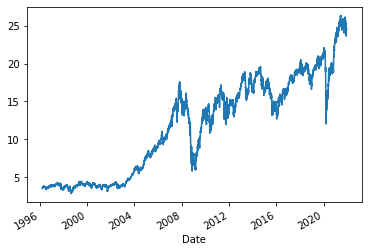

In [131]:
data['Adj Close'].plot()
plt.show()

In [134]:
df_country = df_cape.loc[:, ['Date', 'Australia']]
df_country = df_country[df_country != 0]
df_country

,Date,Australia
288,2005-12-30,29.23
289,2006-01-31,29.23
290,2006-02-28,30.23
291,2006-03-31,29.82
292,2006-04-28,30.74
...,...,...
474,2021-06-30,24.01
475,2021-07-30,24.24
476,2021-08-31,24.41
477,2021-09-30,23.41


In [30]:
ini = df_country.loc[0, 'Date']
ini

'31/12/1981'

In [47]:
a = df_cape[['Date']].copy()
a

,Date
0,31/12/1981
1,29/01/1982
2,26/02/1982
3,31/03/1982
4,30/04/1982
...,...
474,30/06/2021
475,30/07/2021
476,31/08/2021
477,30/09/2021


In [58]:
df_cape['Date'] = pd.to_datetime(a.loc[:, 'Date'], format = '%d/%m/%Y')

In [61]:
df_cape2 = df_cape.copy()

In [63]:
df_cape2['Date'] = pd.to_datetime(df_cape2.loc[:, 'Date'], format = '%d/%m/%Y')

In [64]:
df_cape['Date'] = pd.to_datetime(df_cape.loc[:, 'Date'], format = '%d/%m/%Y')

In [65]:
df_cape

,Date,Australia,Brazil,Canada,China,Europe,France,Germany,Hong Kong,Italy,...,Russia,Singapore,South Africa,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA
0,1981-12-31,12.39,0.00,10.71,0.00,9.02,0.00,9.63,31.22,0.00,...,0.00,33.70,0.00,0.00,11.14,9.20,0.00,0.00,8.84,9.35
1,1982-01-29,11.14,0.00,9.70,0.00,9.24,0.00,9.76,31.91,0.00,...,0.00,33.20,0.00,0.00,11.09,9.06,0.00,0.00,9.28,9.20
2,1982-02-26,10.01,0.00,9.08,0.00,9.12,0.00,9.85,27.17,0.00,...,0.00,30.33,0.00,0.00,10.78,8.80,0.00,0.00,8.77,8.72
3,1982-03-31,9.50,0.00,8.52,0.00,8.97,0.00,10.13,24.11,0.00,...,0.00,28.73,0.00,0.00,9.97,8.79,0.00,0.00,8.92,8.53
4,1982-04-30,10.57,0.00,8.28,0.00,9.14,0.00,10.12,25.61,0.00,...,0.00,29.84,0.00,0.00,9.44,8.86,0.00,0.00,9.02,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2021-06-30,24.01,21.66,25.99,19.18,23.90,27.36,22.74,19.74,24.84,...,10.60,16.43,19.15,17.06,25.34,31.35,32.32,7.70,17.08,38.46
475,2021-07-30,24.24,20.59,26.38,16.54,24.23,28.14,22.72,19.44,26.67,...,10.69,16.83,18.87,17.23,26.20,31.33,31.30,7.80,17.10,38.62
476,2021-08-31,24.41,18.57,26.05,16.18,24.50,28.02,22.56,19.13,25.04,...,11.08,16.35,18.31,17.01,25.58,31.94,31.59,8.10,17.58,38.91
477,2021-09-30,23.41,17.17,25.06,15.37,23.57,26.91,21.66,18.03,24.69,...,11.70,16.48,17.74,16.77,24.08,29.80,30.39,7.52,17.29,37.11


In [110]:
ewz = df_cape.loc[:, ['Date', 'Brazil']]
ewz = EWZ[ewz['Brazil'] > 0]

In [111]:
ewz

,Date,Brazil
353,2011-05-31,16.08
354,2011-06-30,15.61
355,2011-07-29,14.95
356,2011-08-31,13.85
357,2011-09-30,12.99
...,...,...
474,2021-06-30,21.66
475,2021-07-30,20.59
476,2021-08-31,18.57
477,2021-09-30,17.17
